<a href="https://colab.research.google.com/github/sundarjhu/Galactic_Dynamics2021/blob/main/Galactic_Dynamics_Lecture09_202103189.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

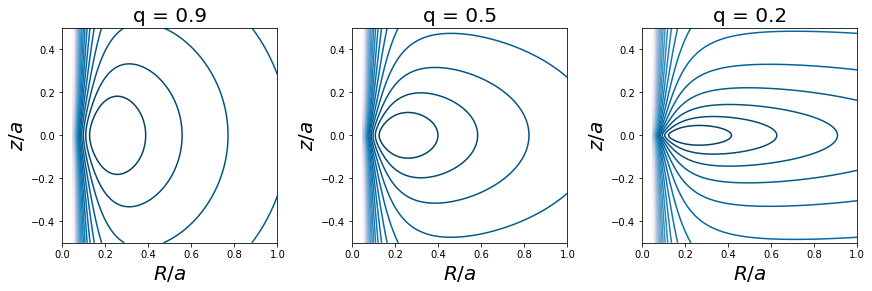

In [28]:
"""
Plot contours of the effective potential in the meridional plane for the logarithmic potential.
"""
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import numpy as np
v0 = 1.0
lz = 0.2
q = [0.9, 0.5, 0.2]
N = 1000
fig, ax = plt.subplots(ncols = 3, nrows = 1, constrained_layout = True, clear = True, figsize = (12, 4))
axf = ax.ravel()
for i in range(len(q)):
  r = np.linspace(0.05, 1, N)
  z = np.linspace(-0.5, 0.5, N)
  R, Z = np.meshgrid(r, z)
  Phi = 0.5 * v0**2 * np.log(R**2 + Z**2 / q[i]**2) + lz**2 / (2 * R**2)
  cs = axf[i].contour(R, Z, Phi, locator = ticker.LinearLocator(numticks = 30), cmap = cm.PuBu_r)
  axf[i].set_xlim(0, 1)
  axf[i].set_ylim(-0.5, 0.5)
  axf[i].set_aspect('equal')
  axf[i].set_xlabel(r'$R/a$', fontsize = 20)
  axf[i].set_ylabel(r'$z/a$', fontsize = 20)
  axf[i].set_title('q = {}'.format(q[i]), fontsize = 20)
  #fig.colorbar(cs, ax = axf[i])

     |████████████████████████████████| 5.9MB 5.3MB/s 
['BurkertPotential', 'CorotatingRotationWrapperPotential', 'CosmphiDiskPotential', 'DehnenBarPotential', 'DehnenCoreSphericalPotential', 'DehnenSmoothWrapperPotential', 'DehnenSphericalPotential', 'DiskSCFPotential', 'DoubleExponentialDiskPotential', 'EllipsoidalPotential', 'EllipticalDiskPotential', 'FerrersPotential', 'FlattenedPowerPotential', 'GaussianAmplitudeWrapperPotential', 'HenonHeilesPotential', 'HernquistPotential', 'HomogeneousSpherePotential', 'InterpSnapshotRZPotential', 'IsochronePotential', 'IsothermalDiskPotential', 'JaffePotential', 'KGPotential', 'KeplerPotential', 'KuzminDiskPotential', 'KuzminKutuzovStaeckelPotential', 'LogarithmicHaloPotential', 'LopsidedDiskPotential', 'MN3ExponentialDiskPotential', 'MWPotential', 'MWPotential2014', 'MiyamotoNagaiPotential', 'MovingObjectPotential', 'NFWPotential', 'NumericalPotentialDerivativesMixin', 'PerfectEllipsoidPotential', 'PlummerPotential', 'Potential', 'PotentialE

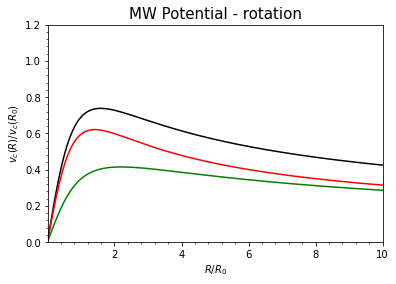

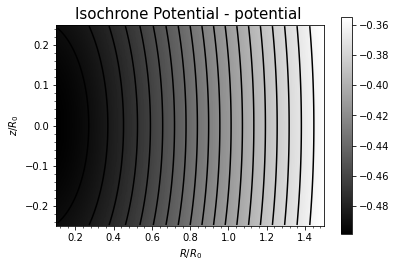

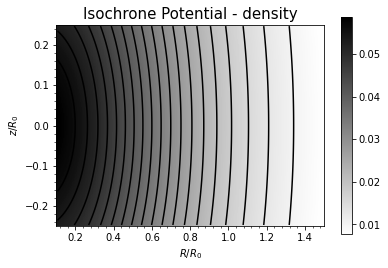

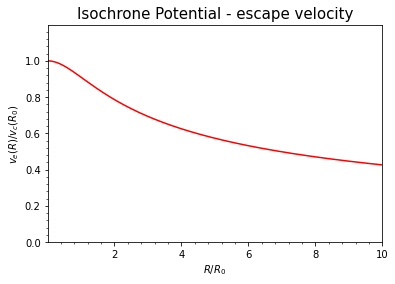

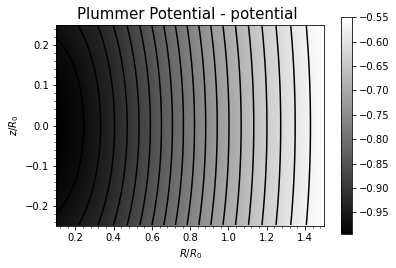

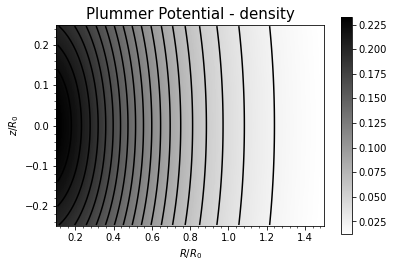

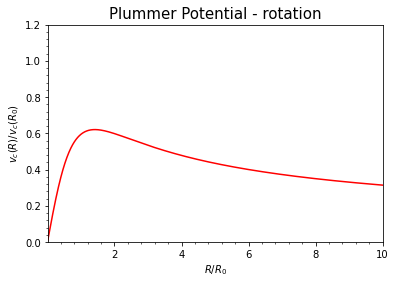

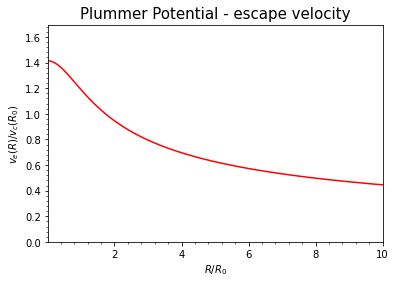

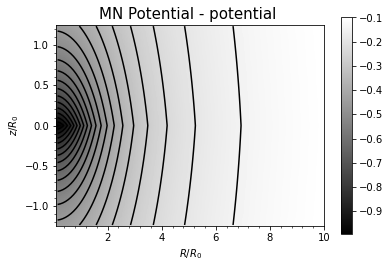

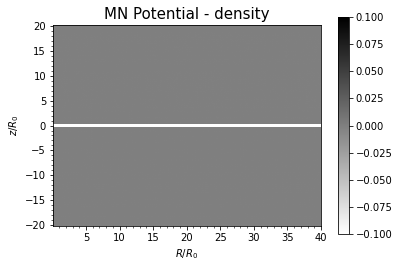

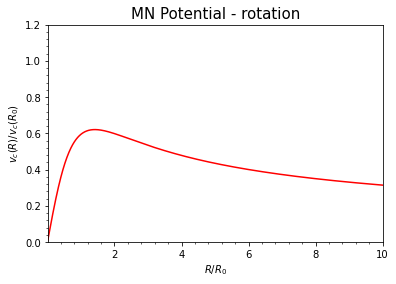

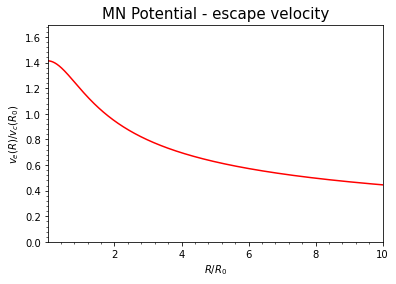

In [2]:
"""
Code snippet from Omaira González-Martín to use galpy, 2020.
Minor modifications by Sundar Srinivasan, March 2021.
"""
import matplotlib.pyplot as plt
import numpy as np
import math
import pylab
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
try:
  import galpy
except ImportError:
  !pip install galpy
  import galpy
import galpy.potential
from galpy.potential import plotPotentials
from galpy.potential import plotDensities
from galpy.potential import plotRotcurve
from galpy.potential import plotEscapecurve
from pylab import axis, figure, plot, subplot, xlabel, ylabel, ylim, fill_between, subplots_adjust, setp, show, savefig
#import galpy.orbit
#import galpy.actionAngle
#import galpy.df
#import galpy.util
#from galpy.orbit import Orbit

##############################################################
# Mostrar la lista de potenciales que hay en GALPY:
print([p for p in dir(galpy.potential) if 'Potential' in p])
##############################################################

##############################################################
# POTENCIAL DE ISOCRONO
##############################################################

##############################################################
# Cargando el tipo de potencial que queremos:
from galpy.potential import IsochronePotential
isp = IsochronePotential(amp=1,b=1.,normalize=False)
from galpy.potential import PlummerPotential
plp = PlummerPotential(amp=1,b=1.,normalize=False)
ptotal = [isp,plp]

## Curva de rotacion
plotRotcurve(ptotal,Rrange=[0.01,10.],grid=1001,yrange=[0.,1.2],color='Black')
plotRotcurve(plp,Rrange=[0.01,10.],grid=1001,yrange=[0.,1.2],color='Red',overplot='yes')
plotRotcurve(isp,Rrange=[0.01,10.],grid=1001,yrange=[0.,1.2],color='Green',overplot='yes')
plt.title("MW Potential - rotation", color='black',size=15) 
savefig('MW_rotcurve.png')

## Curvas de potencial
im = plotPotentials(isp,rmin=0.1,zmax=0.25,zmin=-0.25,nrs=101,nzs=101)
plt.colorbar(im)
plt.title("Isochrone Potential - potential ", color='black',size=15) 
savefig('Isochr_potential.png')

## Curvas de densidad
im = plotDensities(isp,rmin=0.1,zmax=0.25,zmin=-0.25,nrs=101,nzs=101)
plt.colorbar(im)
plt.title("Isochrone Potential - density", color='black',size=15) 
savefig('Isochr_density.png')

## Curva de velocidad de escape
plotEscapecurve(isp,Rrange=[0.01,10.],grid=1001,color='Red')
plt.title("Isochrone Potential - escape velocity", color='black',size=15) 
savefig('Isochr_escvel.png')

##############################################################
# POTENCIAL DE PLUMMER
##############################################################

##############################################################
# Cargando el tipo de potencial que queremos:
from galpy.potential import PlummerPotential
plp = PlummerPotential(amp=1,b=1.,normalize=False)

## Curvas de potencial
im = plotPotentials(plp,rmin=0.1,zmax=0.25,zmin=-0.25,nrs=101,nzs=101)
plt.colorbar(im)
plt.title("Plummer Potential - potential ", color='black',size=15) 
savefig('Plummer_potential.png')

## Curvas de densidad
im = plotDensities(plp,rmin=0.1,zmax=0.25,zmin=-0.25,nrs=101,nzs=101)
plt.colorbar(im)
plt.title("Plummer Potential - density", color='black',size=15) 
savefig('Plummer_density.png')

## Curva de rotacion
plotRotcurve(plp,Rrange=[0.01,10.],grid=1001,yrange=[0.,1.2],color='Red')
plt.title("Plummer Potential - rotation", color='black',size=15) 
savefig('Plummer_rotcurve.png')

## Curva de velocidad de escape
plotEscapecurve(plp,Rrange=[0.01,10.],grid=1001,color='Red')
plt.title("Plummer Potential - escape velocity", color='black',size=15) 
savefig('Plummer_escvel.png')

##############################################################
# PERFIL APLANADO (Miyamoto & Nagai)
##############################################################
# Cargando el tipo de potencial que queremos:
from galpy.potential import MiyamotoNagaiPotential
pp = MiyamotoNagaiPotential(amp=1,a=1., b=0.,normalize=False)

## Curvas de potencial
im = plotPotentials(pp,rmin=0.1,rmax=10.,zmax=1.25,zmin=-1.25,nrs=101,nzs=101)
plt.colorbar(im)
plt.title("MN Potential - potential ", color='black',size=15) 
savefig('MN_potential_ba2.png')

## Curvas de densidad
im = plotDensities(pp,rmin=0.1,rmax=40.,zmax=20.25,zmin=-20.25,nrs=101,nzs=101)
plt.colorbar(im)
plt.title("MN Potential - density", color='black',size=15) 
savefig('MN_density_ba2.png')

## Curva de rotacion
plotRotcurve(pp,Rrange=[0.01,10.],grid=1001,yrange=[0.,1.2],color='Red')
plt.title("MN Potential - rotation", color='black',size=15) 
savefig('MN_rotcurve_ba2.png')

## Curva de velocidad de escape
plotEscapecurve(pp,Rrange=[0.01,10.],grid=1001,color='Red')
plt.title("MN Potential - escape velocity", color='black',size=15) 
savefig('MN_escvel_ba2.png')

##########################################################################################
# OBJETIVO 1: Comparar las curvas para distintos cocientes b/a (mismos que en el temario)
##########################################################################################



########################################################################
# OBJETIVO 2: Implementar otra curva vista en los potenciales aplanados 
########################################################################


